In [1]:
import numpy as np
import pandas as pd
import nltk
import os


import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In C:\Users\akhil\Anaconda3\envs\first\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\akhil\Anaconda3\envs\first\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\akhil\Anaconda3\envs\first\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\akhil\Anaconda3\envs\first\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\akhil\Anaconda3\envs\first\lib\site-

Data is taken from [dataset_link](https://www.kaggle.com/datasets/julian3833/jigsaw-toxic-comment-classification-challenge?resource=download)

which is used in [competition_link](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge) competition in 2018.

Task:
You are provided with a large number of Wikipedia comments which have been labeled by human raters for toxic behavior. The types of toxicity are:
<br>
toxic<br>
severe_toxic<br>
obscene<br>
threat<br>
insult<br>
identity_hate<br>
You must create a model which predicts a probability of each type of toxicity for each comment.

# File descriptions
train.csv - the training set, contains comments with their binary labels<br/>
test.csv - the test set, you must predict the toxicity probabilities for these comments. To deter hand labeling, the test set contains some comments which are not included in scoring.<br/>
sample_submission.csv - a sample submission file in the correct format<br/>
test_labels.csv - labels for the test data; value of -1 indicates it was not used for scoring; (Note: file added after competition close!)<br/>

In [2]:
data_path=r'data'

In [3]:
full_path=os.path.join(os.getcwd(),data_path)
os.listdir(full_path)

['sample_submission.csv', 'test.csv', 'test_labels.csv', 'train.csv']

Tested sample_submission.csv

In [4]:
df = pd.read_csv('data/train.csv')

In [5]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

From this we can conclude that it doesn't have any null values in all 15971 rows.

In [7]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


Here, it looks like problem is like this based on the text we have to do multilabel binary classification of data of length 6 which is each indicating :<br/> \[toxic, sever_toxic, obscene, treat, insult, identity_hate\]

Also, it looks like data will be inbalanced let's check that out as well.

In [8]:
df['toxic'].value_counts().tolist()

[144277, 15294]

In [9]:
cols=df.columns.tolist()[2:]
#Here , i am taking approx ratios, as that would be enough to understand the imbalance
for col in cols:
    all_values=df[col].value_counts().tolist()
    ratio=round(all_values[0]/all_values[1])
    print(f"All values of {col} is:\n 0 : {all_values[0]} 1: {all_values[1]} , ratio: {ratio}:1")

All values of toxic is:
 0 : 144277 1: 15294 , ratio: 9:1
All values of severe_toxic is:
 0 : 157976 1: 1595 , ratio: 99:1
All values of obscene is:
 0 : 151122 1: 8449 , ratio: 18:1
All values of threat is:
 0 : 159093 1: 478 , ratio: 333:1
All values of insult is:
 0 : 151694 1: 7877 , ratio: 19:1
All values of identity_hate is:
 0 : 158166 1: 1405 , ratio: 113:1


In [10]:
toxic_total_comments=0
for index, row in df.iterrows():
    total=sum(row.tolist()[2:])
    if total>0:
        toxic_total_comments+=1
print(f"Total toxic comments: {toxic_total_comments}")

Total toxic comments: 16225


In [11]:
#fast way to do above calculation

df_toxic=df.loc[:,'toxic':]
toxic_sum=df_toxic.sum(axis=1) #adding all rows so toxic comments will be non zero returns pandas.core.series.Series
#just need to count non zeros in above pandas series
total_toxic_comments=np.count_nonzero(toxic_sum.to_numpy())

print(f"Total toxic comments: {toxic_total_comments}")

Total toxic comments: 16225


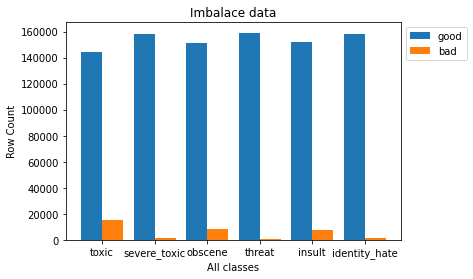

In [14]:
import matplotlib.pyplot as plt
import numpy as np


cols=df.columns.tolist()[2:]
zero=[]
one=[]
for col in cols:
    count = df[col].value_counts().tolist()
    zero.append(count[0])
    one.append(count[1])

x = np.arange(len(cols))  # the label locations
width = 0.55  # the width of the bars

plt.bar(x - 0.2, zero, 0.4, label = 'good')
plt.bar(x + 0.2, one, 0.4, label = 'bad')
  
plt.xticks(x, cols)
plt.xlabel("All classes")
plt.ylabel("Row Count")
plt.title("Imbalace data")
plt.legend(bbox_to_anchor=(1.0, 1.00))
plt.show()

Data seems to be highly imbalance.<br/>
Total len : 159571<br/>
toxic 9:1 ,severe_toxic 99:1 ,obscene 18:1 ,threat 333:1 ,insult 19:1 ,identity_hate 113:1 <br/>
<br/>
total toxic 16225<br/>
ratio 10:1

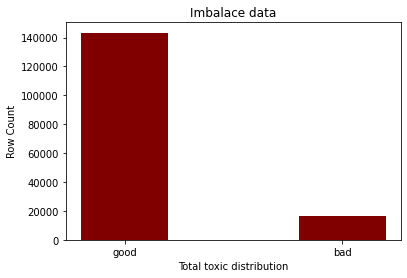

In [13]:
x=[0,1]
y=[159571-16225,16225]
cols=['good','bad']
plt.bar(x, y, color ='maroon',width = 0.4)
plt.xticks(x, cols)

plt.title("Imbalace data")
plt.ylabel("Row Count")
plt.xlabel("Total toxic distribution")

plt.show()

Ways to handle imbalance data in NLP task:<br/>
* SMOTE (Type of sampling not work well with high dimension data like this)
* Wordnet based data augmentation(here words are replaced with syonyms words)
* undersmapling . (datasize will reduce drastically )
* Oversampling of small class . (lead to lots of duplicate )

Here , Also the data is of type multi label binary classifcation. Which can be done by a model itself.

# preprocessing of text data

In [119]:
import re
from spellchecker import SpellChecker


spell = SpellChecker()
stop_words=['in','of','at','a','the'] # custom stopwords as here negative words do have impact and we can't remove like don't, isn't
def remove_whitespace(text):
    return  " ".join(text.split())

def remove_punct(text):
    punc = '''!()-[]{};:"\,<>./?@#$%^&*_~0123456789'''   # not using '
    #test_str = text.replace(ele, "")
    text_list=text.split()
    return_string=[]
    
    for text_of_list in text_list:
        #print(text_of_list)
        all_text = ''.join([c for c in text_of_list if c not in punc])
        #print(all_text)
        return_string.append(all_text)
    #print(return_string)
    new_string=' '.join(return_string)
    #print(new_string)
    return new_string

def spell_check(text):   
    result = []
    text_data=text.split()
    for word in text_data:
        correct_word = spell.correction(word)    
        result.append(correct_word)
    new_string=' '.join(result)
    return new_string

def remove_stop_words(text):
    removed_stop_words = []
    for word in text:
        if word != stop_words:
            removed_stop_words.append(word)
    new_string=''.join(removed_stop_words)
    return new_string
    
def preprocessing_text(text_df):
    #lower case
    text_df=text_df.str.lower()  
    text_df=text_df.apply(remove_punct) # removed punctation other than 'and numbers as well
    text_df=text_df.apply(remove_whitespace) # remove extra white spaces
    text_df=text_df.apply(spell_check)
    text_df=text_df.apply(remove_stop_words)
    
    return text_df

In [120]:
first_text=df.loc[:3,'comment_text']
text=preprocessing_text(first_text)
for sub_text in text:
    print("--------")
    print(sub_text)

--------
explanation why the edits made under my username hardcore metallica fan were reverted they weren't vandalism just closure on some gas after i voted at new york dolls fac and please don't remove the template from the talk page since i'm retired now
--------
draw he matches this background colour i'm seemingly stuck with thanks talk january ut
--------
hey man i'm really not trying to edit war it's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info
--------
more i can't make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if noone else does first if you have any preferences for formatting style on references or want to do it yourself please le

In [108]:
from nltk.corpus import stopwords
print(stopwords.words('english'))



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '